In [311]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [312]:
test_df = pd.read_csv("../dataset/test.csv")
data = pd.read_csv("../dataset/train.csv")

In [313]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [314]:
data.shape ### colonne + ligne 

(1460, 81)

In [315]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [316]:
data.info() ###voir les valeur manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [317]:
print(data.isna().sum()/len(data)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [318]:
tmp_na = (data.isna().sum()/len(data))*100
print(tmp_na)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [319]:
tmp_na[tmp_na > 50]

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [320]:
drop_columns=tmp_na[tmp_na > 50].index.tolist()

In [321]:
drop_columns

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [322]:
data.drop(columns=drop_columns,inplace=True)

In [323]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [324]:
datatna=data.isna().sum()
datatna[datatna>0].index.tolist()


['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [325]:
datatna=data.isna().any()

In [326]:
data.isna().any()[data.isna().any()==True].index.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [327]:
na_cols= data.isna().any()[data.isna().any()==True].index.tolist()
na_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [328]:
##datatFrontage"].fillna("median")

In [329]:
data["LotFrontage"].fillna(data["LotFrontage"].median(),inplace=True)


In [330]:
##datantage"].median()

In [331]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [332]:
data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<Axes: >

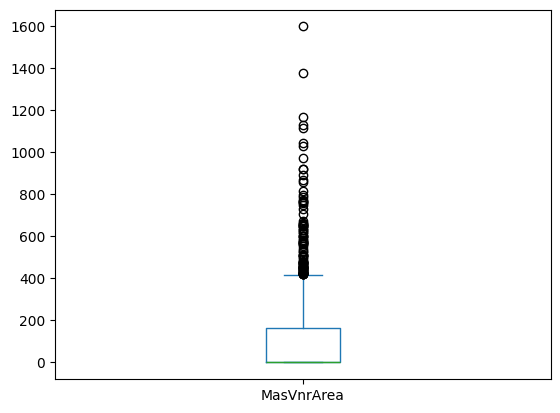

In [333]:
data["MasVnrArea"].plot.box()

In [334]:
data["MasVnrArea"].fillna(0,inplace=True)

In [335]:
data["MasVnrArea"].isna().sum()

0

In [336]:
data["BsmtQual"].mode() ###valeur plus frequente

0    TA
Name: BsmtQual, dtype: object

In [337]:
data["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [338]:
data["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [339]:
data["BsmtQual"].fillna(method='ffill',inplace=True)

C:\Users\Ni2\AppData\Local\Temp\ipykernel_14216\1405323443.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["BsmtQual"].fillna(method='ffill',inplace=True)


In [340]:
data["BsmtQual"].ffill(inplace=True)

In [341]:
data["BsmtQual"].isna().sum()

0

In [342]:
data["BsmtCond"].unique()
data["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [343]:
data["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [344]:
data["YearBuilt"].unique()
data["YearBuilt"].value_counts()



quartiles = pd.qcut(data['YearBuilt'], q=4, labels=["PO", "FA", "TA", "GD"])

print(quartiles)

### max et GD :100% a 75%
### max et GD :75%% a 50%
### max et GD :50% a 25%
### max et GD :25% a min%




0       GD
1       TA
2       GD
3       PO
4       TA
        ..
1455    TA
1456    TA
1457    PO
1458    PO
1459    FA
Name: YearBuilt, Length: 1460, dtype: category
Categories (4, object): ['PO' < 'FA' < 'TA' < 'GD']


In [345]:
data['BsmtCond'].fillna(quartiles,inplace=True)


In [346]:
data["BsmtCond"].isna().sum()

0

In [347]:
data.BsmtCond.value_counts()

BsmtCond
TA    1317
Gd      65
Fa      45
PO      18
FA      12
Po       2
GD       1
Name: count, dtype: int64

In [348]:
data.isna().sum()[data.isna().sum()>0]

BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [349]:
data.drop("FireplaceQu",axis=1,inplace=True)

In [350]:
data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [351]:
data["Electrical"].fillna(data.Electrical.mode()[0],inplace=True)

In [352]:
data.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [353]:
data.dropna(axis=0,inplace=True)

In [354]:
data.shape


(1347, 75)

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotFrontage    1347 non-null   float64
 4   LotArea        1347 non-null   int64  
 5   Street         1347 non-null   object 
 6   LotShape       1347 non-null   object 
 7   LandContour    1347 non-null   object 
 8   Utilities      1347 non-null   object 
 9   LotConfig      1347 non-null   object 
 10  LandSlope      1347 non-null   object 
 11  Neighborhood   1347 non-null   object 
 12  Condition1     1347 non-null   object 
 13  Condition2     1347 non-null   object 
 14  BldgType       1347 non-null   object 
 15  HouseStyle     1347 non-null   object 
 16  OverallQual    1347 non-null   int64  
 17  OverallCond    1347 non-null   int64  
 18  YearBuilt    

In [356]:
cal_col = [col for col in data.columns if data[col].dtype == 'object']
cal_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

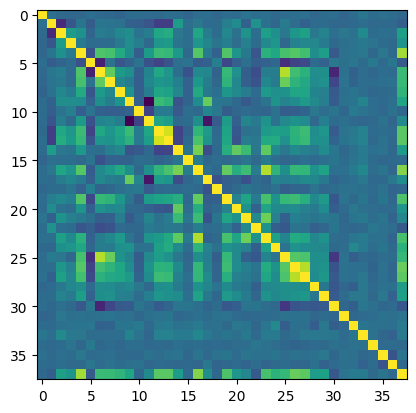

In [357]:
import matplotlib.pyplot as plt

corr_mat = data.corr(numeric_only=True)
plt.figure()
plt.imshow(corr_mat)




In [358]:
data.LotFrontage.value_counts()

LotFrontage
69.0     257
60.0     120
80.0      67
70.0      63
75.0      51
        ... 
106.0      1
137.0      1
140.0      1
38.0       1
46.0       1
Name: count, Length: 107, dtype: int64

In [359]:
from sklearn.preprocessing import LabelEncoder



for col in cal_col:
    le = LabelEncoder()
    data[col+'_le']= le.fit_transform(data[col])


In [360]:
##data.iloc[:;20]

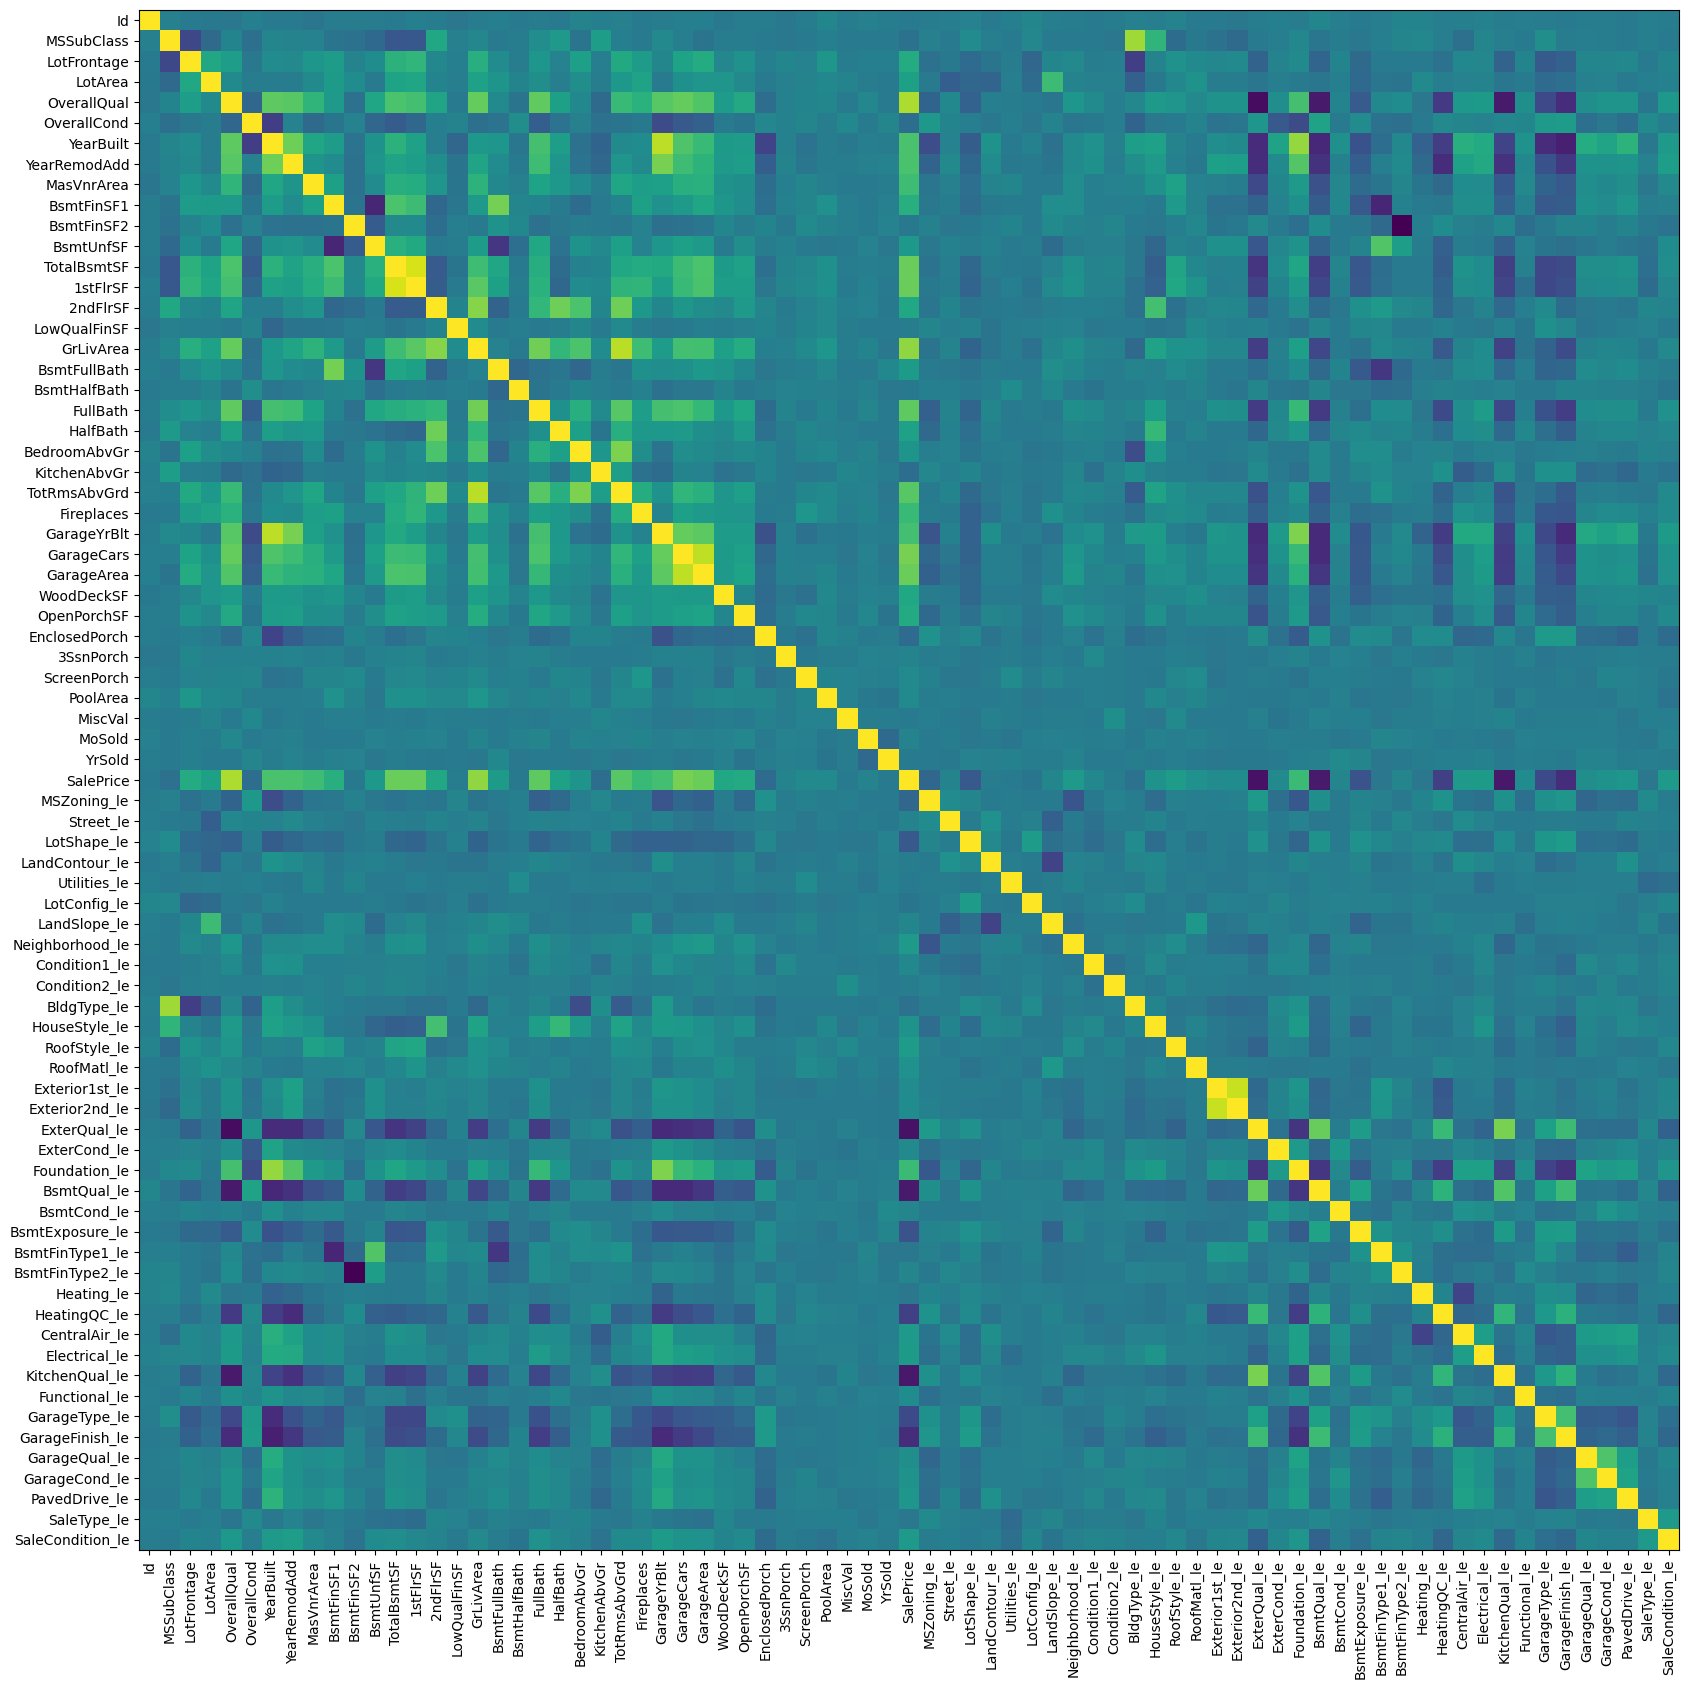

In [361]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']
corr_mat = data.corr(numeric_only=True)


# Create a figure
plt.figure(figsize=(20, 20))
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)

# Show the plot
plt.show()


In [362]:
corre_score = corr_mat["SalePrice"]

corr_var=corre_score[(corre_score >=0.5)|(corre_score <=-0.5)]

In [363]:
corr_var

oh_columns = [ele.replace("_le","") for ele in corr_var.index if ele.endswith("_le")]
print(oh_columns)

['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish']


In [364]:
pd.get_dummies(data[oh_columns])

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
2,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True
4,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True
1457,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1458,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True


In [365]:
pd.get_dummies(data[oh_columns[0]])

,Ex,Fa,Gd,TA
0,False,False,True,False
1,False,False,False,True
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1455,False,False,False,True
1456,False,False,False,True
1457,True,False,False,False
1458,False,False,False,True


In [366]:
for col in oh_columns:
    data = pd.concat([
        data,
        pd.get_dummies(data[col], dtype='int', prefix=col+'_')
    ], axis=1)




In [367]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,0,0,1,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,1,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1


In [368]:
from sklearn.model_selection import train_test_split

quant_vars = corr_var.index[:10].tolist()

In [369]:

cat_vals = [[ele for ele in data.columns if ele.startswith(col + '__')] for col in oh_columns]

cat_vals

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [370]:
[ele for ele in cat_vals]

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [371]:
cat_vals = np.concatenate ([ele for ele in cat_vals]).tolist() 

inputs_cols = quant_vars + cat_vals

In [372]:
X = data[inputs_cols]

y = data['SalePrice']

X.shape, y.shape

((1347, 25), (1347,))

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [374]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((942, 25), (405, 25), (942,), (405,))

##################################################
Model in progress: reg_lin


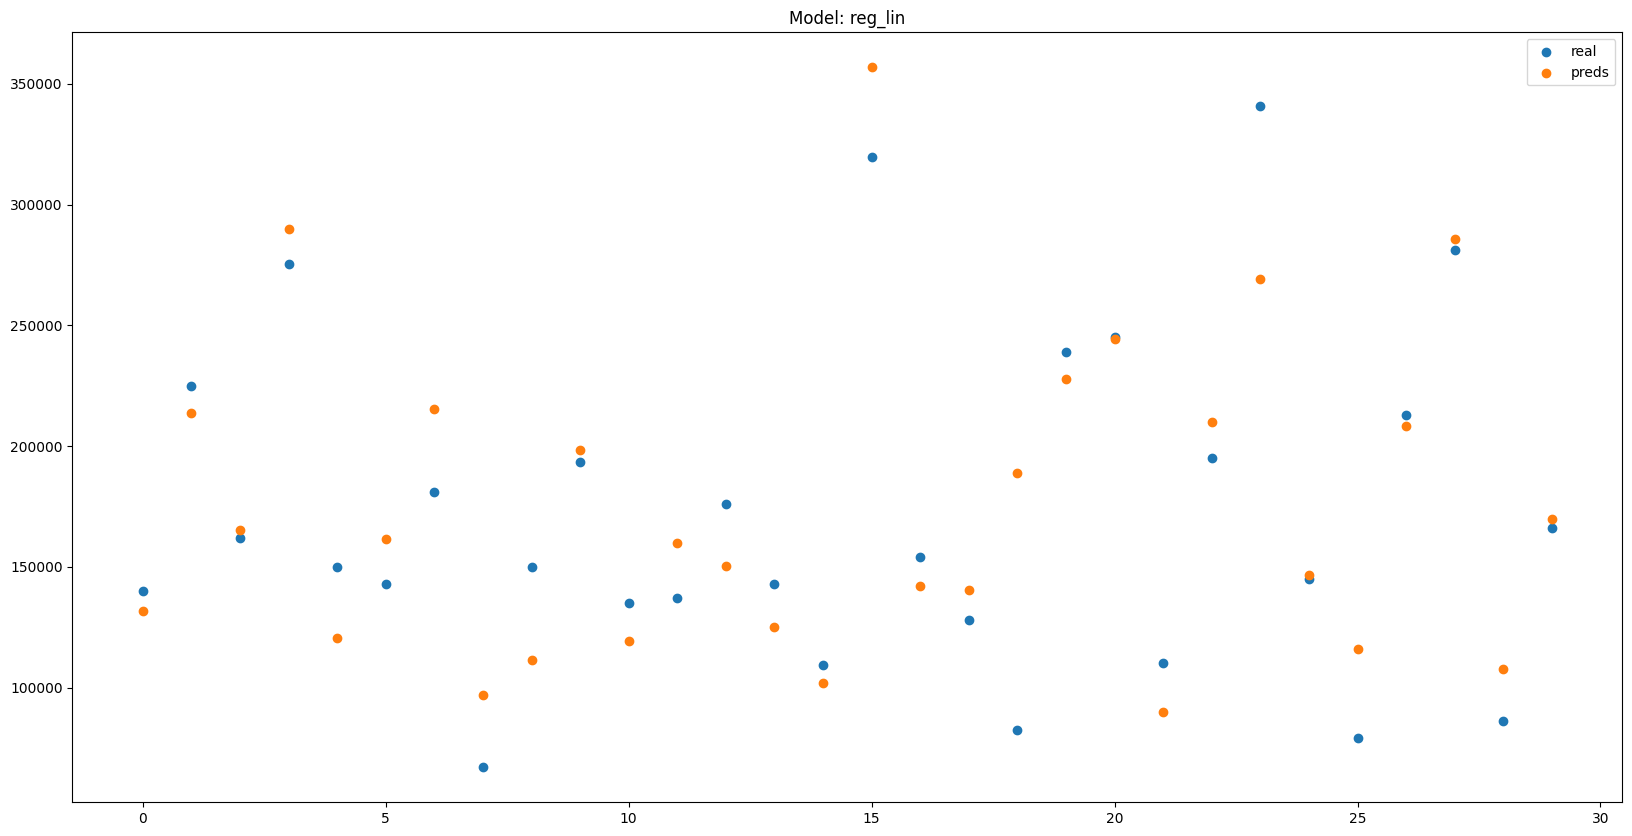

##################################################
Model in progress: rand_for


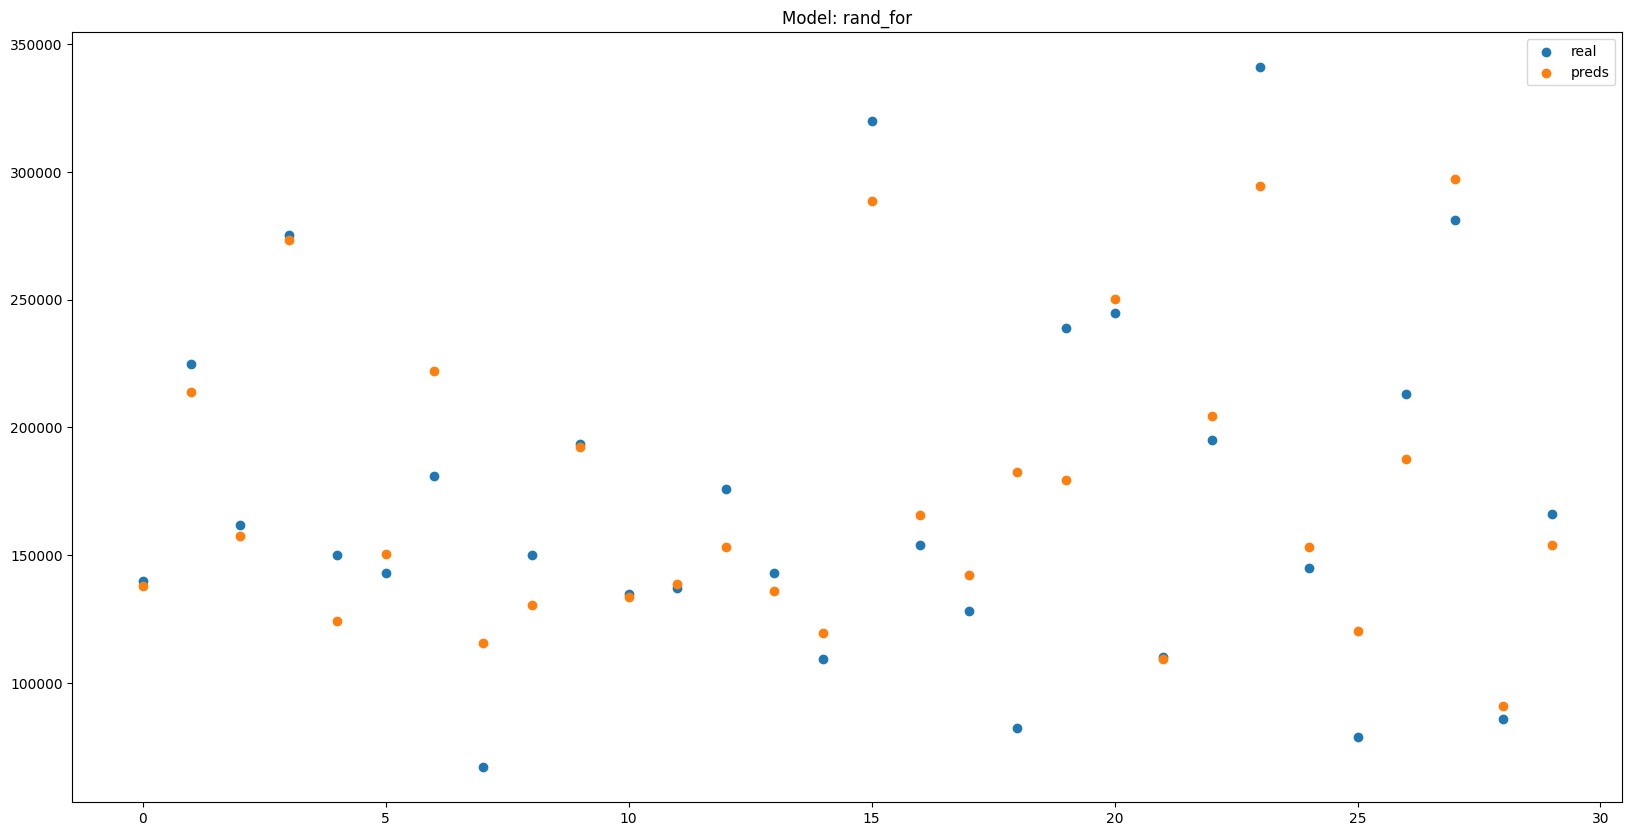

##################################################
Model in progress: SVR


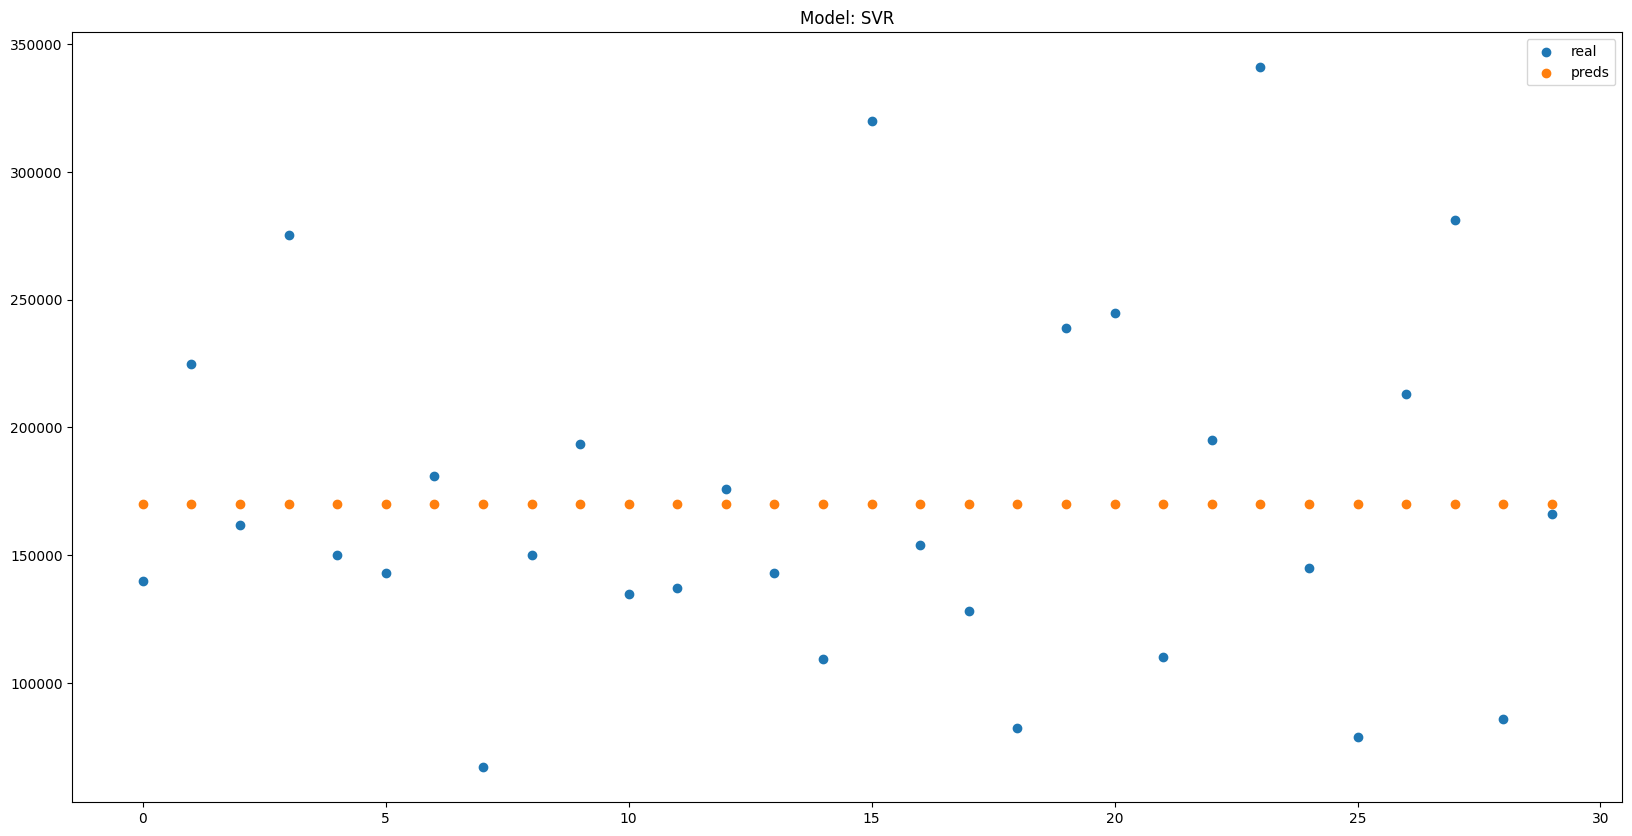

      model        R2           MAE           MSE
0   reg_lin  0.756025  22876.433326  1.372436e+09
0  rand_for  0.779382  20057.488207  1.241043e+09
0       SVR -0.035666  52800.878622  5.825947e+09


In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the models
models = {
    "reg_lin": LinearRegression(),
    "rand_for": RandomForestRegressor(),
    "SVR": SVR()
}

# Initialize an empty DataFrame to store the scores
scores_df = pd.DataFrame()

# Train and evaluate each model
for model_name, model in models.items():
    print("#" * 50)
    print("Model in progress:", model_name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    # Append the scores to the DataFrame
    scores_df = pd.concat([
        scores_df,
        pd.DataFrame({
            "model": [model_name],
            "R2": [r2],
            "MAE": [mae],
            "MSE": [mse]
        })
    ], axis=0)
    
    # Plot the results
    plt.figure(figsize=(20, 10))
    plt.scatter(x=range(30), y=y_test[:30], label='real')
    plt.scatter(x=range(30), y=predictions[:30], label='preds')
    plt.legend()
    plt.title(f"Model: {model_name}")
    plt.show()

# Display the scores
print(scores_df)


In [376]:
sorted_scores_df = scores_df.sort_values(by="R2", ascending=False)


In [377]:
print(sorted_scores_df)


      model        R2           MAE           MSE
0  rand_for  0.779382  20057.488207  1.241043e+09
0   reg_lin  0.756025  22876.433326  1.372436e+09
0       SVR -0.035666  52800.878622  5.825947e+09


In [378]:
research_space = {
    'n_estimators' : [50, 80, 150, 200],
    'max_depth' : [50, 100, 200]
}

In [383]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = RandomForestRegressor()
grid_model = GridSearchCV(model, research_space, verbose=0)

In [384]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 100, 200],
                         'n_estimators': [50, 80, 150, 200]})

In [381]:
grid_model.best_score_

0.8051825460246894

In [382]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=200)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=50, n_estimators=50;, score=0.855 total time=   0.6s
[CV 2/5] END .....max_depth=50, n_estimators=50;, score=0.813 total time=   0.6s
[CV 3/5] END .....max_depth=50, n_estimators=50;, score=0.662 total time=   0.6s
[CV 4/5] END .....max_depth=50, n_estimators=50;, score=0.834 total time=   0.5s
[CV 5/5] END .....max_depth=50, n_estimators=50;, score=0.843 total time=   0.6s
[CV 1/5] END .....max_depth=50, n_estimators=80;, score=0.855 total time=   0.9s
[CV 2/5] END .....max_depth=50, n_estimators=80;, score=0.810 total time=   1.0s
[CV 3/5] END .....max_depth=50, n_estimators=80;, score=0.684 total time=   1.1s
[CV 4/5] END .....max_depth=50, n_estimators=80;, score=0.836 total time=   1.0s
[CV 5/5] END .....max_depth=50, n_estimators=80;, score=0.842 total time=   0.9s
[CV 1/5] END ....max_depth=50, n_estimators=150;, score=0.854 total time=   1.9s
[CV 2/5] END ....max_depth=50, n_estimators=150;

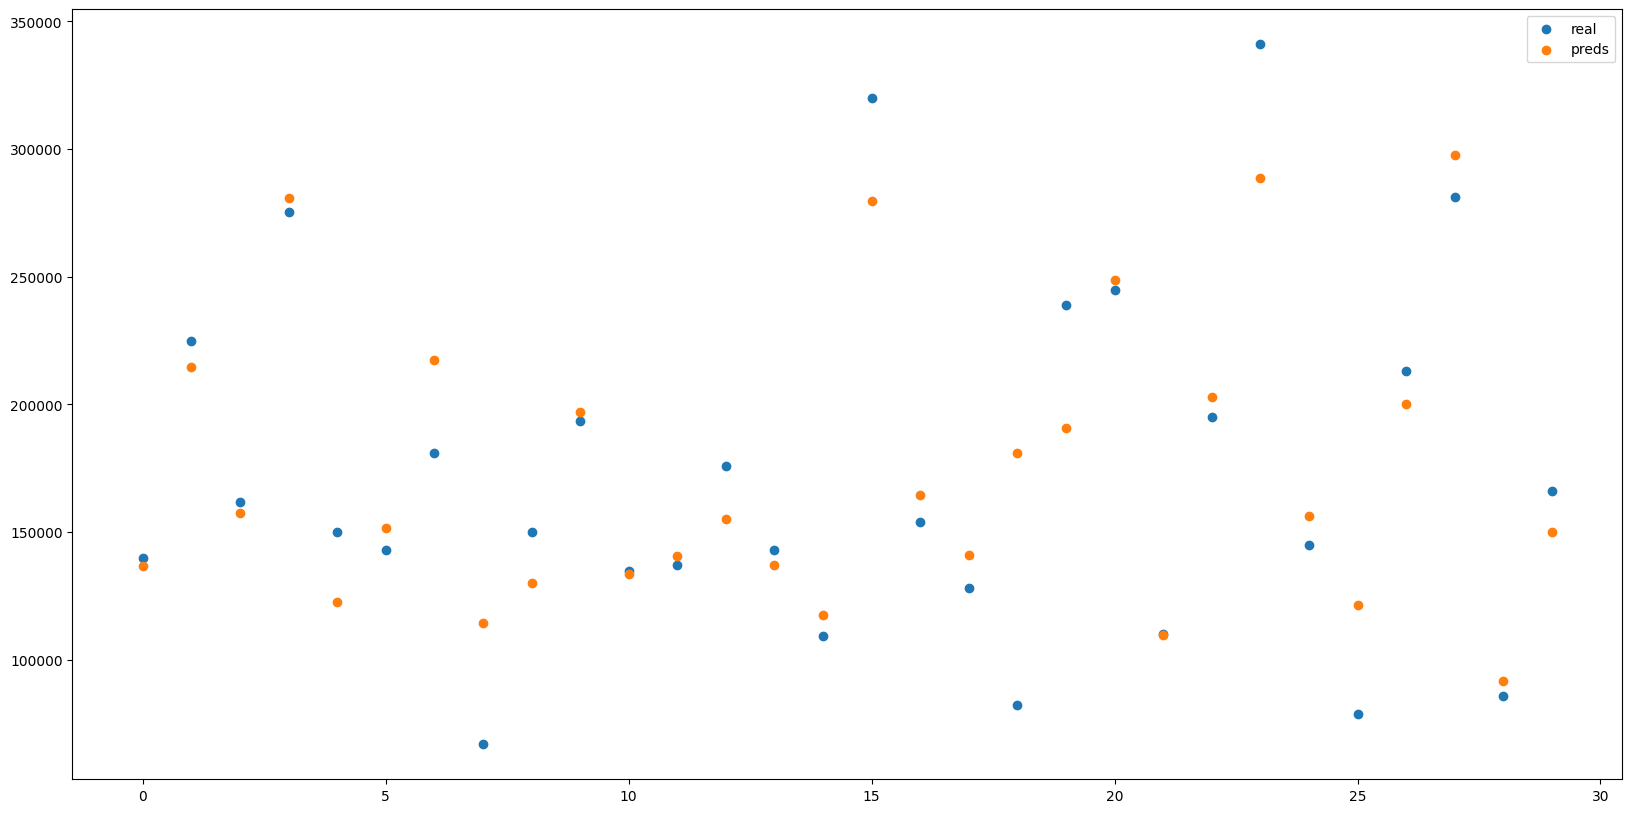

In [388]:
grid_model = GridSearchCV(model, research_space, verbose=3)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": 'Rand forst Grid_search',
        "R2": r2_score(y_test, predictions),
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions)
    }])
], axis=0)

# Plot the results
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='real')
plt.scatter(x=range(30), y=predictions[:30], label='preds')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....max_depth=200, n_estimators=80;, score=0.852 total time=   1.0s
[CV 2/5] END ....max_depth=200, n_estimators=80;, score=0.814 total time=   1.0s
[CV 3/5] END ....max_depth=200, n_estimators=80;, score=0.693 total time=   1.0s
[CV 4/5] END ....max_depth=200, n_estimators=80;, score=0.830 total time=   1.0s
[CV 5/5] END ....max_depth=200, n_estimators=80;, score=0.839 total time=   0.9s
[CV 1/5] END ...max_depth=200, n_estimators=150;, score=0.849 total time=   1.8s
[CV 2/5] END ...max_depth=200, n_estimators=150;, score=0.806 total time=   1.8s
[CV 3/5] END ...max_depth=200, n_estimators=150;, score=0.668 total time=   1.8s
[CV 4/5] END ...max_depth=200, n_estimators=150;, score=0.832 total time=   1.8s
[CV 5/5] END ...max_depth=200, n_estimators=150;, score=0.840 total time=   1.9s
[CV 1/5] END ....max_depth=100, n_estimators=50;, score=0.850 total time=   0.6s
[CV 2/5] END ....max_depth=100, n_estimators=50;

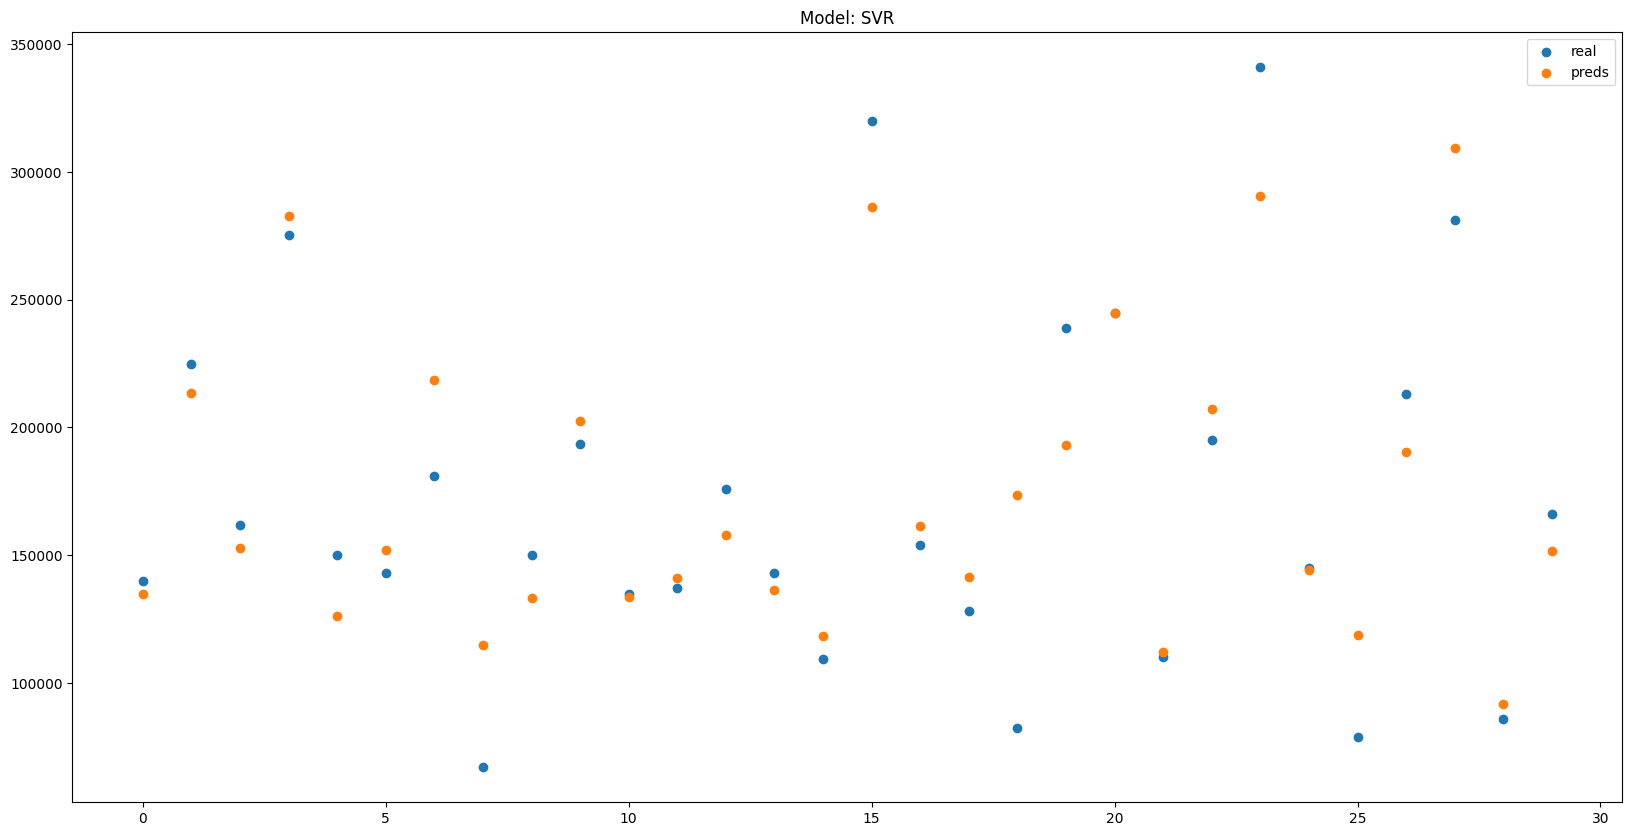

In [389]:
grid_model = RandomizedSearchCV(model, research_space, verbose=3)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)
# Append the scores to the DataFrame
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": 'Rand forst Grid_search',
        "R2": r2_score(y_test, predictions),
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions)
    }])
], axis=0)

# Plot the results
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='real')
plt.scatter(x=range(30), y=predictions[:30], label='preds')
plt.legend()
plt.title(f"Model: {model_name}")
plt.show()

In [390]:
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [391]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu')) 
model.add(Dense(1))  

Epoch 1/100


30/30 - 2s - loss: 41936470016.0000 - mean_squared_error: 41936470016.0000 - val_loss: 39574110208.0000 - val_mean_squared_error: 39574110208.0000 - 2s/epoch - 63ms/step
Epoch 2/100
30/30 - 0s - loss: 41934741504.0000 - mean_squared_error: 41934741504.0000 - val_loss: 39571509248.0000 - val_mean_squared_error: 39571509248.0000 - 139ms/epoch - 5ms/step
Epoch 3/100
30/30 - 0s - loss: 41930350592.0000 - mean_squared_error: 41930350592.0000 - val_loss: 39564824576.0000 - val_mean_squared_error: 39564824576.0000 - 144ms/epoch - 5ms/step
Epoch 4/100
30/30 - 0s - loss: 41919856640.0000 - mean_squared_error: 41919856640.0000 - val_loss: 39550550016.0000 - val_mean_squared_error: 39550550016.0000 - 201ms/epoch - 7ms/step
Epoch 5/100
30/30 - 0s - loss: 41899311104.0000 - mean_squared_error: 41899311104.0000 - val_loss: 39524716544.0000 - val_mean_squared_error: 39524716544.0000 - 210ms/epoch - 7ms/step
Epoch 6/100
30/30 - 0s - loss: 41864417280.0000 - mean_squared_error: 4186441728

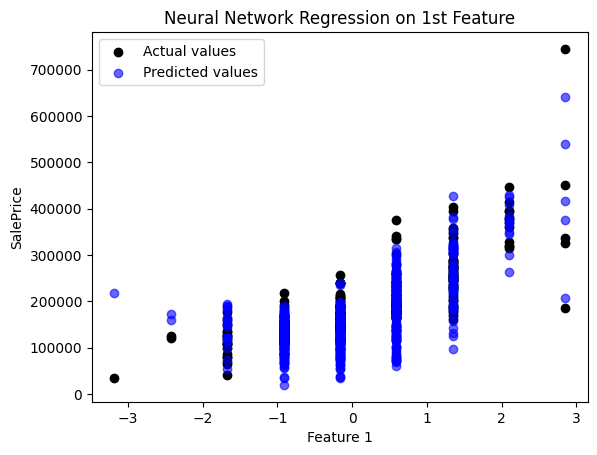

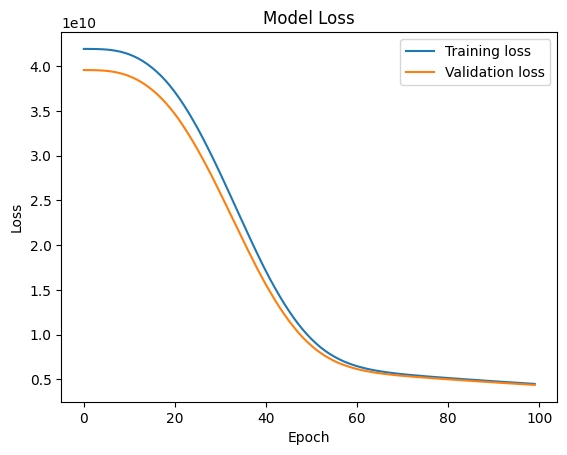

In [392]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=2)

# Évaluation du modèle
loss, mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on test data: {mse:.2f}")

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du R² et RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score on test data: {r2:.2f}")
print(f"RMSE on test data: {rmse:.2f}")

# Visualisation des prédictions vs valeurs réelles pour la première caractéristique
plt.scatter(X_test[:, 0], y_test, color="black", label="Actual values")
plt.scatter(X_test[:, 0], y_pred, color="blue", label="Predicted values", alpha=0.6)

plt.xlabel("Feature 1")
plt.ylabel("SalePrice")
plt.title("Neural Network Regression on 1st Feature")
plt.legend()
plt.show()

# Tracer l'historique de la perte pour voir comment le modèle a convergé
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()